In [1]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Plots, SymPy, LAcode
##] dev --local "."
#title( "The Singular Value Decomposition", sz=30, color="darkred")

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">The Pseudoinverse</strong><br><strong style="height:100px;color:darkred;font-size:25px;">Moore-Penrose Inverse</strong></div>

> **Examples:**
>
> $\quad\quad
\left( \begin{array}{cc|c} \color{red}5 & \color{red}0 & 0 \\ \color{red}0 & \color{red}1 & 0 \\ \hline 0 & 0 & 0 \end{array}\right),\quad
\left( \begin{array}{cc|c} \color{red}5 & \color{red}0 & 0 \\ \color{red}0 & \color{red}1 & 0\end{array}\right), \quad
\left( \begin{array}{cc} \color{red}5 & \color{red}0 \\ \color{red}0 & \color{red}1 \\ \hline 0 & 0 \end{array}\right),\quad
$
where the $\color{red}{\Sigma_r}$ entries are shown in red.

The derivation shows one way of computing the SVD:
* Start with either $A^t A$ (size $N \times N$, or $A A^t$ (size $M \times M$).<br>
  We typically choose the smaller matrix.<br>

<div style="margin:30px;border:1px solid black;">

* **Compute the orthogonal eigendecomposition of $A^t A.$**<br>
  $\;\;$ this results in $\Sigma_r$, $V_r$<br>
  $\;\;$ and (optionally) an orthogonal basis for $\mathscr{N}(A)$.
  * If the full SVD is required, <br>
    we need to compute an orthogonal basis for $\mathscr{N}(A),$<br>
    and obtain $\Sigma$ by augmenting $\Sigma_r$ with zeros to the same size as $A.$
* **Compute $U_r = A V_r \Sigma_r^{-1} \Leftrightarrow u_i = \frac{1}{\sigma_i} A v_i$**
* If the full SVD is required, **compute an orthogonal basis** $\tilde{v}_i, i=1,2, \dots M-r$<br>
    $\;\;$ for $\mathscr{N}(A^t) = \mathscr{N}(A A^t) = span\{u_1, u_2, \dots u_r \}^\perp.$
</div>

#### **Example**

Let $A = \begin{pmatrix}  -3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
 \end{pmatrix}$

##### **Step 1: Orthonormal Eigendecomposition of $A^t A$**

**Eigenvalues:**

> $A^t A = \begin{pmatrix} 20 & 12 & 4 \\
12 & 20 & -4 \\
4 & -4 & 4
\end{pmatrix}$ has characteristic polynomial
$p(\lambda) = - \lambda ( \lambda^2 + 44 \lambda -384 )$
>
> $\therefore \lambda  = 32, 12,0$.



**Eigenvector Basis**

> Bases for the null spaces $\mathscr{N}(A- \lambda I)$ are shown in the table below.<br>
**Caveat:** the eigenvalues must be entered in decreasing order<br>
**Caveat:** remember to use QR on the bases for each eigenspace

<div style="float:left;margin:30px;width:40%;">
<table border="1" cellpadding="0" cellspacing="0" style="border-collapse: collapse" width="300px">
<tr>
    <td height="19" width="100px">$\color{blue}{\sigma=\sqrt{\lambda}}$</td>
    <td height="19" width="100px">$4 \sqrt{2}$</td>
    <td height="19" width="100px">$2 \sqrt{3}$</td>
    <td height="19" width="100px">$\quad\quad 0$</td>
</tr>
<tr>
    <td height="19" width="100px">$\color{blue}\lambda$</td>
    <td height="19" width="100px">$32$</td>
    <td height="19" width="100px">$12$</td>
    <td height="19" width="100px">$\quad\quad 0$</td>
</tr>
<tr>
    <td height="16" width="100px" ><span  style="color:blue;">(m)</span></td>
    <td height="16" width="100px"><span  style="justify:right;">$\quad$ (1)</span></td>
    <td height="16" width="100px">$\quad$ (1)</td>
    <td height="16" width="100px">$\quad\;$ (1)</td>
</tr>
<tr>
    <td height="19" width="100px"><span  style="color:blue;">Basis for $E_\lambda$</span></td>
    <td height="19" width="100px">$\;\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\;\begin{pmatrix} -1 \\ 1 \\ -1 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\quad\;\begin{pmatrix} -1 \\ 1 \\ 2 \end{pmatrix}\;$</td>
</tr>
<tr>
    <td height="19" width="100px"><span  style="color:blue;">Orthonormal Basis for $E_\lambda$</span></td>
    <td height="19" width="100px">$\;\begin{pmatrix} \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\;\begin{pmatrix} -\frac{\sqrt{3}}{3} \\ \frac{\sqrt{3}}{3} \\ -\frac{\sqrt{3}}{3} \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\quad\;\begin{pmatrix} -\frac{\sqrt{6}}{6} \\ \frac{\sqrt{6}}{3} \\ 0 \end{pmatrix}\;$</td>
</tr>
</table>
</div><div style="float:right;margin:30px;width:40%;">
Therefore $\quad \color{red}{rank(A) = 2}$

$V = \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)$

$\Sigma = \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
\end{array}\right)$
</div>

##### **Step 2: $U_r$**

$U_r = A V_r \Sigma_r^{-1} = \frac{1}{2}\begin{pmatrix} -1 & -1 \\
-1 & -1 \\
1 & -1 \\
-1 & 1
\end{pmatrix}$

##### **Verify the Compact SVD**


$$A = U_r \Sigma_r V_r^t = \frac{1}{2}\begin{pmatrix} -1 & -1 \\
-1 & -1 \\
1 & -1 \\
-1 & 1
    \end{pmatrix}\quad \begin{pmatrix}
4 \, \sqrt{2} & 0 \\
0 & 2 \, \sqrt{3}
    \end{pmatrix}\quad \frac{1}{6} \begin{pmatrix}
3 \, \sqrt{2} & 2 \, \sqrt{3} \\
3 \, \sqrt{2} & -2 \, \sqrt{3} \\
0 & 2 \, \sqrt{3}
\end{pmatrix}^t \quad = \begin{pmatrix}
-3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
\end{pmatrix}
$$

##### **Step 3: Obtain Ũ_r and Complete U for the Full SVD**

The columns of $\tilde{U}_r$ are an orthonormal basis $\mathscr{N}(A^t) = \mathscr{N}(A A^t) = span\{u_1, u_2, \dots u_r \}^\perp.$

We have a **choice:**
* obtain and orthonormal basis for $\mathscr{N}(A^t)$
* obtain and orthonormal basis for $\mathscr{N}(A A^t)$
* obtain and orthonormal basis for $\mathscr{N}(U^t)$

A basis for $\mathscr{N}(A^t)$ is given by $\left\{\; 
 \begin{pmatrix}-1 \\ 1 \\ 0 \\ 0 \end{pmatrix},\
 \begin{pmatrix}-1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
\;\right\}$; using QR, an orthonormal basis is $\left\{\; 
 \begin{pmatrix}-\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \\ 0 \end{pmatrix},\
 \begin{pmatrix}0 \\ 0 \\ \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \end{pmatrix} 
\;\right\}$

Finally $U = \left( U_r \; \tilde{U}_r \right)$:

$$U = \frac{1}{2}\begin{pmatrix}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
\end{pmatrix}
$$

##### **Verify the full SVD**

$$ A = U \Sigma V^t =
\frac{1}{2}\left( \begin{array}{rr|rr}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
    \end{array} \right) \quad
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
        \end{array}\right) \quad
 \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)^t
$$

<hr style="height:3px;">
<strong style="color:magenta;"> TODO: Start new Notebook here...</strong>

## 3.1 Change of Coordinate Systems and Scaling

<div style="float:left;width:35%;height:6.8cm;border:1px solid black;padding:10px;">

$\left. \begin{align}
    y & = U \Sigma V^t x \\
    x &= V \tilde{x} \\
    \tilde{y} & = \Sigma \tilde{x} \\
    \end{align} \right\} \Rightarrow y = U \Sigma \tilde{x} = U \tilde{y}.$
    
* $\color{green}{x = V \tilde{x}}\;\;$ change to $V_r, \tilde{V}_r$ coordinates
* $\color{blue}{\tilde{x}_r = V_r x} \;$ drop the null space component
* $\color{blue}{\tilde{y}_r = \Sigma_r \tilde{x}_r}$ **scale** and map to $U_r, \tilde{U}_r$ coordinates
* $\color{red}{y = U \tilde{y}_r}\;$ change to the $y$ coordinates
    
The transformation $\mathscr{R}(A) \xrightarrow{\Sigma} \mathscr{C}(A)$ is 1-1 onto
</div>

<img src="Figs/SVDaction.svg" width=600 style="float:right;">

Let's follow this with some vector $x$ and the matrix $A$ from the previous example:

Take $x = \begin{pmatrix} 2 \\ 1 \\ - 1 \end{pmatrix},\quad  \text{ then }\quad
\tilde{x} = V^t x = \frac{\sqrt{6}}{6} \left( \begin{array}{r} 3 \sqrt{3} \\ 0 \\ \hline \color{red}3 \end{array} \right),\quad
\tilde{y} = \Sigma \tilde{x} =
\left( \begin{array}{r} 12 \\ 0 \\  \hline \color{red}0 \\ \color{red}0 \\ \color{red}0 \end{array} \right), \quad
y = U \tilde{y} = 6 \begin{pmatrix} -1 \\ -1 \\ 1 \\ -1 \end{pmatrix}.
$

> Let us rewrite the SVD equation:
> $$\begin{align}A &= U_r \Sigma_r V_r^t = \color{red}{\sigma_1} u_1 v_1^t + \color{red}{\sigma_2} u_2 v_2^t + \dots \color{red}{\sigma_r} u_r v_r^t.
\end{align}$$

> This clearly show the action of $A$ on a vector $x$:<br>
$\quad\quad\ \color{red}{\sigma_i}\ u_i v_i^t\; x = (\color{red}{\sigma_i}\ v_i \cdot x)\ u_i \quad$ computes the length of the orthogonal projection of $x$ onto $v_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ scales it by $\sigma_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ and assigns it to the corresponding vector $u_i$.

## 3.2 Stretching a Sphere

An alternate way of visualizing the action of $A$ is to consider $A \hat{x}$,<br>
i.e., the action of $A$ on vectors on a unit sphere.

https://www.youtube.com/watch?v=_wOt50VnJw4

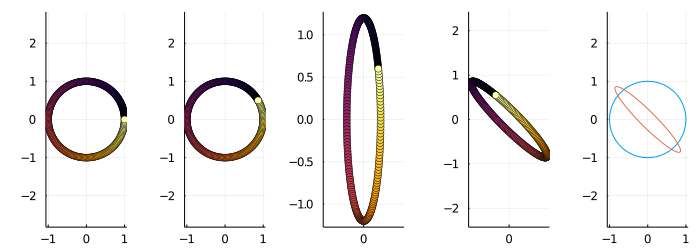

In [4]:
U = [1. -1; 1 1]/sqrt(2)
V = [sqrt(3) 1; -1 sqrt(3)]/2
Σ = [ 0.2 0; 0 1.2]
A = U*Σ*V

# define the unit circle
t = range(0,stop=2π,length=200)
x = [cos.(t) sin.(t)]' 

# apply A = U Σ V' to each point on the circle
x̃ = V'x
ỹ = Σ*x̃
y = U*ỹ

p = plot( x[1,:],x[2,:] )
p = plot!(  y[1,:], y[2,:], aspect_ratio=:equal )
plot(
    scatter(x[1,:],x[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(x̃[1,:],x̃[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(ỹ[1,:],ỹ[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(y[1,:],y[2,:], zcolor=t, aspect_ratio=:equal),
    p, xticks=[-1,0, 1],
    layout=(1,5), legend=:none, colorbar=:none, size=(700,250)
)

# 1. The Pseudoinverse

## 1.1. A Preimage of $y = A x$

Let $A = U \Sigma V^t$ be a singular value decomposition of $A$ and consider $A x = b.$

The substitutions $x = V \tilde{x}$ and $b = U \tilde{b}$ are invertible change of coordinates<br>
that **do not change the geometric description** of the transformation $A$.

$$A x = b \Leftrightarrow \Sigma \tilde{x} = \tilde{b},\quad \text{ where } \quad
\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}.\label{eq4}\tag{4}
$$

----
Now split $\tilde{x} = \left( \begin{array}{c} \tilde{x}_r \\ \hline \tilde{\xi} \end{array} \right),
\tilde{b} = \left( \begin{array}{c} \tilde{b}_r \\ \hline \tilde{\beta} \end{array} \right)
$ where the first $r$ entries $\tilde{x}_r$ and $\tilde{b}_r$ <br>
$\quad\quad$ are the $\mathscr{R}(A)$ and $\mathscr{N}(A^t)$
components of the $\tilde{x}$ and $\tilde{b}$ vectors respectively.

Substituting these in Eq 4 yields $\tilde{x}_r = \Sigma_r \tilde{b}_r \Leftrightarrow \tilde{b}_r = \Sigma_r^{-1} \tilde{x}_r.\label{eqn5}\tag{5}$

The components $\tilde{\xi}$ and $\tilde{\beta}$ in the respective nullspaces
do not enter: they are irretrievably lost.<br>
$\quad\quad$ The $\Sigma_r$ matrix in Eq 5 however is invertible. 

---
**Remarks:**
* If we restrict the domain and codomain of $y = A x$ to $\mathscr{R}(A)$ and $\mathscr{C}(A)$ respectively,<br>
the transformation is 1-1 and onto, i.e., it is invertible.
* I.e., for $\tilde{x} = \left( \begin{array}{c} \tilde{x}_r \\ \hline 0 \end{array} \right),
\tilde{b} = \left( \begin{array}{c} \tilde{b}_r \\ \hline 0 \end{array} \right)$,
we have $\begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}\tilde{x} = \tilde{b} \Leftrightarrow
\tilde{b} = \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix}\tilde{x} \Leftrightarrow
b = V \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix} U^t x.
$

## 1.2 The Pseudoinverse and the Reduced Pseudoinverse

<div style="float:left;width:35%;height:7cm;padding:5pt;background-color:#F2F5A9;">

**Definition:** Let $A$ in  $\mathbb{R}^{M \times N}$<br>$\quad$ have an SVD $A = U \Sigma V^t$.<br><br>
$\quad$ The pseudoinverse $A^\dagger = V \Sigma^\dagger U^t$, where<br><br>
    $$\Sigma^\dagger = \begin{pmatrix} \Sigma_r& 0 \\ 0 & 0 \end{pmatrix}^\dagger =
    \begin{pmatrix} \Sigma_r^{-1} & 0 \\ 0 & 0 \end{pmatrix}$$
    
</div>
<div style="float:left;width:60%;height:7cm;padding:5pt;">

**Remarks:**

* If $A$ is invertible, $A^\dagger = A^{-1}.$
* The pseudoinverse has a reduced form: $A^\dagger = V_r \Sigma^{-1} U_r^t.$
<img src="Figs/PseudoInverse.svg" width=400/>
</div>

#### **Example**

##### **The Earlier SVD Example**

$$\begin{align} A =&\ \begin{pmatrix}  -3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
 \end{pmatrix}  = \; U \Sigma V^t \\[2mm] =&\ 
\frac{1}{2}\left( \begin{array}{rr|rr}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
    \end{array} \right) \quad
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
        \end{array}\right) \quad
 \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)^t
\end{align}$$

##### **The PseudoInverse**

$$
A^\dagger = V_r \Sigma_r^{-1} U_r^t =
\frac{1}{6} \left( \begin{array}{cc} 3 \sqrt{2} &  2 \sqrt{3} \\
                                     3 \sqrt{2} & -2 \sqrt{3} \\
                                     0          & 2 \sqrt{3}  \end{array} \right)\;
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0\\
                                      0 & \color{red}{2 \sqrt{3}}
        \end{array}\right)^{-1} \;
\frac{1}{2}\left( \begin{array}{rr}
-1 & -1 \\
-1 & -1 \\
 1 & -1 \\
-1 &  1 \end{array} \right)^t
$$

$$
A^\dagger = \frac{1}{48} \left(\begin{array}{rrrr}
-7 & -7 & -1 & 1 \\
1 & 1 & 7 & -7 \\
-4 & -4 & -4 & 4
\end{array}\right)
$$

##### **Repeated Application of $A, A^\dagger$**

The following computation maps $\quad\quad$
$x \in \color{blue}{\mathbb{R}^3} \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)} \xrightarrow{A\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)}  \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)}, $   $\quad\quad: \boxed{A A^\dagger A = A}$

$$
x = \begin{pmatrix} 2\\ 1 \\ -1 \end{pmatrix} \;\Rightarrow\; \color{red}{b_\parallel} = A x = -6 \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix}
\;\Rightarrow\; \color{red}{x_\parallel} = A^\dagger b_\parallel = \frac{3}{2}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
\;\Rightarrow\;\color{red}{ b_\parallel} = A x_\parallel =  -6 \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix}
$$

The following computation maps $\quad\quad$
$b \in \color{blue}{\mathbb{R}^4} \xrightarrow{A^\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)} \xrightarrow{A} \color{red}{b_\parallel} \in \color{blue}{\mathscr{C}(A)}  \xrightarrow{A\dagger} \color{red}{x_\parallel} \in \color{blue}{\mathscr{R}(A)}, $   $\quad\quad: \boxed{A^\dagger A A^\dagger = A^\dagger}$

$$
b = \begin{pmatrix} -7\\ -5 \\ 7 \\ -5 \end{pmatrix} \;\Rightarrow\; \color{red}{x_\parallel} = A^\dagger b = \frac{3}{2}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
\;\Rightarrow\; \color{red}{b_\parallel} = A x_\parallel = -6 \begin{pmatrix} 1 \\ 1 \\ -1 \\ 1 \end{pmatrix}
\;\Rightarrow\;\color{red}{ x_\parallel} = A^\dagger b_\parallel = \frac{3}{2}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}
$$

## 1.3 **Projection Matrices**

$$
A^\dagger A = \frac{1}{6}\left(\begin{array}{rrr}
5 & 1 & 2 \\
1 & 5 & -2 \\
2 & -2 & 2
\end{array}\right)\quad\quad \text{ is the orthogonal projection}\quad x \in \mathbb{R}^3 \xrightarrow{A^\dagger A} x_\parallel \in \mathscr{R}(A)
$$

$$
A A^\dagger = \frac{1}{2} \left(\begin{array}{rrrr}
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 1 & -1 \\
0 & 0 & -1 & 1
\end{array}\right)
\quad\quad \text{ is the orthogonal projection}\quad b \in \mathbb{R}^4 \xrightarrow{A A^\dagger} b_\parallel \in \mathscr{C}(A)
$$

##### **Remarks**

* The preimage $x_\parallel = A^\dagger A x$ of $b = A x$ is the **minimum length** solution of $A x = b$
* The preimage $b_\parallel = A A^\dagger b$ of $x = A^\dagger b$ is the **minimum length** solution of $A^t b = x$

# 2. Application to the Normal Equation

<div style="float:left;width:40%;height:5.6cm;padding:5pt;">
<div style="background-color:#F2F5A9;padding-bottom:0.5cm;">

**Theorem:** Let $A$ in $\mathbb{R}^{M \times N}$<br>$\quad$ have an SVD factorization $A = U \Sigma V^t$.<br>
    $\quad$ Then $x = A^\dagger b \Rightarrow A^t A x = A^t b$
</div>
<br><br>

**Remark:** This theorem states that<br>$\qquad$  we can use the pseudoinverse<br>
    $\qquad$ to obtain a solution of the normal equation.
</div>
<div style="float:right;width:55%;border-left:2px solid black;padding-left:0.5cm;">
We have to show that $x^\dagger = A^\dagger b$ satisfies $A^t(A x^\dagger - b) = 0$<br><br>

$\begin{align}
A^t ( A x^\dagger - b ) &= A^t (U \Sigma V^t V \Sigma^\dagger U^t b -b) \\
                &= A^t U(\Sigma \Sigma^\dagger - I) U^t b \\
                &= V \Sigma^t (\Sigma \Sigma^\dagger - I) U^t b \\
                &= 0, \quad \text{since}
\end{align}$

$\begin{align}\Sigma^t ( \Sigma \Sigma^\dagger - I ) & = \Sigma^t \left(\begin{pmatrix} I & 0 \\ 0 & 0 \end{pmatrix} - I\right) = \Sigma^t \begin{pmatrix} 0 & 0 \\ 0 & -I \end{pmatrix} \\
&= \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 0 & 0 \\ 0 & -I \end{pmatrix} = 0\end{align}$
<div>

# 5. APPLICATIONS

<hr style="height:3px;">
<strong style="color:magenta;"> TODO: Separate Notebook for the Applications...</strong>

## 5.1 Low Rank Approximation

**Idea**

$\quad\quad A = \sigma_1 u_1 v_1^t + \sigma_2 u_2 v_2^t + \dots \sigma_r u_r v_r^t,$, where<br>
$\quad\quad \sigma_1 \ge \sigma_2 \dots \ge \sigma_r >0.$

Terms decrease in importance with increasing index. How about truncating the series?

> **Remark:** The basis vectors are ordered by their contribution to $A$:
>
> The first column vector in $V_r$ is associated with the largest $\sigma_1$ value

##### **SVD of the Mandrill Test Image**

In [7]:
using Images, TestImages, MosaicViews
img = float.(testimage("mandrill"))
channels = channelview(img)

function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end
svdfactors = svd.(eachslice(channels; dims=1));

##### **Plots**

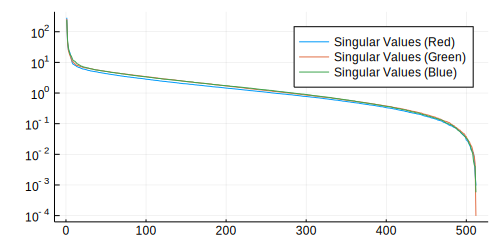

In [3]:
plot(  svdfactors[1].S, yscale=:log10,  label="Singular Values (Red)")
plot!( svdfactors[2].S, yscale=:log10, label="Singular Values (Green)")
plot!( svdfactors[3].S, yscale=:log10, label="Singular Values (Blue)", size=(500,250))

HTML{String}("<div><p style=\"color:blue;font-size:15pt;height:15px;text-align:left;\">Original Image, 10, 50, 100 terms</p></div>")

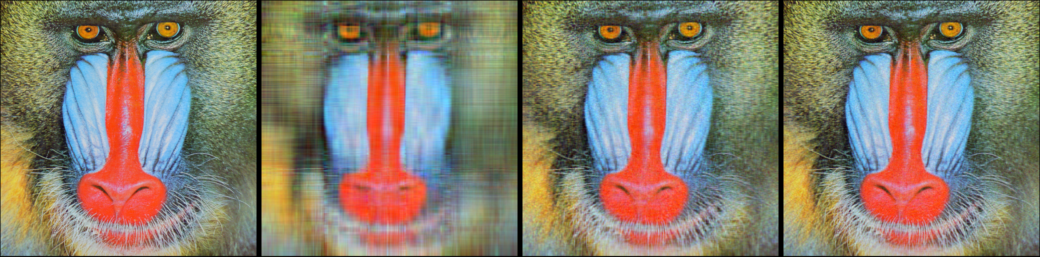

In [4]:
imgs = map((10, 50, 100)) do k
    colorview(RGB, rank_approx.(svdfactors, k)...)
end
title("Original Image, 10, 50, 100 terms",sz=15)
mosaicview(img, imgs...; nrow=1, npad=10)

In [9]:
using Interact
@manipulate for i in 1:length(svdfactors[1].S)
    mosaicview(img, colorview(RGB, rank_approx.(svdfactors, i)...), nrow=1,npad=10)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 512,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
256, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/user/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/user/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/user/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/home/user/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/home/user/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fadb1470010, Task (runnable) @0x00007fadb1470010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\"

## 5.2 Principal Component Analysis

* https://www.youtube.com/watch?v=fkf4IBRSeEc
* https://www.cs.princeton.edu/courses/archive/spring12/cos598C/svdchapter.pdf
* https://intoli.com/blog/pca-and-svd/

## 5.3 Of Interest

* https://www.youtube.com/watch?v=_wOt50VnJw4     Brunton: Geometric Interpretation of the SVD
* https://www.youtube.com/watch?v=QQ8vxj-9OfQ     Brunton: Image Compression using the SVD
* https://towardsdatascience.com/svd-8c2f72e264f  Understanding the SVD
* https://github.com/RoyiAvital/Projects/tree/master/SingularValueDecomposition  Another Presentation of the SVD